# COGS 108 - Final Project 

# Overview

In this project, we will explore whether gender inequality truly exists in the film industry in various aspects. We will analyze how the spoke frequency of movie characters are influenced by their distinct gender. Then, we will explore the proportion of gender in films. Also, we will analyze how the leading character's gender in a movie will impact the movie rating and box office. By using data to explore and analyze these sub-questions, we will be able to find the answer to whether gender inequality exists in the film industry.

# Group Members

 - Name: Heejin Kwon 
    
    ID: A15752836
    
    Contributions: Worked on Movie rating VS gender part's data wrangling, cleaning, visulization and analysis; overview; conclusion

 - Name: Yuanyuan Huang
    
    ID: A14707524
    
    Contributions: Spoke frequency vs Gender part's data wrangling, cleaning, visulization and analysis; overview; conclusion

 - Name: Yining Chen
    
    ID: A14909624
    
    Contributions: Gender vs Grossing part's data wrangling, cleaning, visulization and analysis; overview; conclusion

 - Name: Jiaxuan Zhang
    
    ID: A15061347
    
    Contributions: Proportion of gender part's data wrangling, cleaning, visualization and analysis, overview, and conclusion

# Research Question

- How’s the gender of movie characters influence their spoke frequency in movies over time?
- How does the proportion between male and female characters in movies change over time?
- Does leading actor's gender of movie has influence on this movie's rating and box office?
- Does gender inequality exist in the film industry?
- How does the gender of main character affect to the rate of movie? 

## Background and Prior Work

   Gender Inequality has been a serious problem exists in almost every field of society. In the article, “Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age”, written by Hanah Aanderson and Matt Daniels, it uncovers the gender issue that “white men dominate movie roles” by analyzing the film dialogue broken-down by gender [1]. It shows that male characters always have more amount of dialogue than female characters. In addition, The New York Film Academy releases the research, “Gender Inequality in Film Infographic Updated in 2018,” to further ensures the gender issues such that the women employed behind the scenes are roughly 10% compared to men [2].
Inspired by these articles and researches, we decided to focus our topic of this research on “Explore the Gender Inequality in the Film Industry.” We wanted to figure out if gender inequality truly exists in the film industry and how it is reflected. Thus, we came up with the questions such as, are characters’ spoke frequency influenced by their distinct genders, and how the number of female and male characters distributed in movies.
When we looked up on the Internet, we found some datasets that can be used to analyze in order to answer our questions. These datasets cover the information of the movies that were released from the ’90s to present, and each of the movies followed by its characters’ genders, names, and words that spoke in movies. By using the analyzing skills that we learn in the class, we will see the distribution of spoke frequency of the female and male as well as their appearing times in movies. Finally, we can conclude that if gender inequality exists in the film industry.

References (include links):

[1].Aanderson, H., & Daniels, M. (n.d.). The Largest Analysis of Film Dialogue by Gender, Ever. Retrieved from h​ ttps://pudding.cool/2017/03/film-dialogue/index.html

[2].Perrone, J. J. (2018, March 08). Gender Inequality in Film Infographic for 2018. Retrieved from
https://www.nyfa.edu/film-school-blog/gender-inequality-in-film-infographic-updated-in-2018/

# Hypothesis


We predict that gender inequality has long existed in the film industry and it affect to various area. So, we came up with 4 sumed up hyphthesis:  
- the male characters will speak and appear far more than female characters in movies generally.
- the proportion of female characters will always be lower than male characters throughout the years.
- the average rate of movie which is played by male main character will be more higher than female main character.
- the male leading movies have a higher probability to get higher ratings and grossing.
 
The reason for this hypothesis is that the problem of gender inequality has been exposed to our society for a long time and it exists in many fields until now, for example, the workplace, education, etc. Therefore, we assume that it is highly likely that the same issue exists in the film industry. 

# Dataset(s)

 
- Dataset Name: Cornell Movie--Dialogs Corpus
 
  Link to the dataset: https://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html
 Number of observation:  It involves 9,035 characters, labeled with gender, from 617 different movies with 304,713 utterances.
 
  On the website, Cristian Danescu-Niculescu-Mizil, from ​Department of Information Science,​ ​Cornell University​, we found the corpus, “Cornell Movie--Dialogs Corpus”, contains the dataset collection of fictional conversations extracted from movie scripts. 


- Dataset Name: IMDB Gender Data Analysis

  Link to the dataset:  https://data.world/aydh/ellen/workspace/file?filename=title.basics.ellen.tsv

  On data.world, we found a project, “IMDB Gender Data Analysis,” which discover the difference in IMDB ratings for movies with male or female leads. It includes the dataset of the number of actors and actresses that act in different movie from 1986 to 2017.

- Dataset Name: Actor and actress number in Hollywood movies
 
  Link to the dataset:  https://github.com/taubergm/HollywoodGenderData
 
  On the github of HollywoodGenderData, it contains gender information of actors, directors, musics which are related to  Hollywood industry.

- Dataset Name: Leading actor gender and movie analysis

  Link to the dataset: https://github.com/minimaxir/movie-gender

  From Max Woolf's open-sourced Github, it contains the dataset which includes box office of 2020 movies with male or female leads. The year of movies ranges from 2000 to 2016.


# Setup

Import the numpy, pandas, scipy, matplotlib.pyplot,seaborn modules as np, pd, plt, sns, respectively. These libraries will help us loading data from files and plotting visual graphs in order to analyze from it.

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 5

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)


# Data Wrangling

Import the datasets from Cornell Movie--Dialogs Corpus to get the number of dialogue that female and male speak on different movies throughout the years.  
"movie_titles_metadata.txt" -- contains information about each movie title.  
"movie_characters_metadata.txt" -- contains information about each movie character.  
"movie_lines.txt" -- contains the actual text of each utterance.  
"movie_conversations.txt" -- contains the structure of the conversations.  
Since the columns of these files are seperated by special character `+++$+++` and the unknown value is written as "?", in order to successfully load the data, we use read_csv to load the data, set the sep to `+++$+++`, engine to 'python' and na_values to "?".

In [3]:
#dataset from Cornell Movie--Dialogs Corpus
movie_titles_df = pd.read_csv("movie_titles_metadata.txt",sep=" \+\+\+\$\+\+\+ ",engine='python',na_values="?")
movie_characters_df = pd.read_csv("movie_characters_metadata.txt",sep=" \+\+\+\$\+\+\+ ",engine='python',na_values="?")
movie_lines_df = pd.read_csv("movie_lines.txt",sep=" \+\+\+\$\+\+\+ ",engine='python',na_values="?")
movie_conversations_df = pd.read_csv("movie_conversations.txt",sep=" \+\+\+\$\+\+\+ ",engine='python',na_values="?")

Import the dataset from HollyWoodGenderData to get the proportion of gender
"all_actors_movies_gender_gold.csv" -- contains information about the time and name of the movie characters.

In [7]:
#read data file(Gender proportion)
df_nofc = pd.read_csv('all_actors_movies_gender_gold.csv', encoding='cp1252')
df_nofc

,year,name,...,released,gender
0,2000,Mission: Impossible 2,...,2000/05/24,male
1,2000,Mission: Impossible 2,...,2000/05/24,male
2,2000,Mission: Impossible 2,...,2000/05/24,female
...,...,...,...,...,...
20368,2018,Destroyer,...,2018/08/31,male
20369,2018,Destroyer,...,2018/08/31,male
20370,2018,Destroyer,...,2018/08/31,male


drop unecessary columns 'year', 'budget','language','released','runtime','gross','country', 'starring'

In [8]:
#drop unecessary columns
df_nofc.drop(columns=['year', 'budget','language','released','runtime','gross','country', 'starring'],inplace= True)
df_nofc

,name,gender
0,Mission: Impossible 2,male
1,Mission: Impossible 2,male
2,Mission: Impossible 2,female
...,...,...
20368,Destroyer,male
20369,Destroyer,male
20370,Destroyer,male


In [9]:
df_rating = pd.read_csv("title.ratings.ellen.tsv",sep='\t')
#print(df_rating)
df_principals = pd.read_csv("title.principals.ellen2.tsv",sep='\t')
#print(df_principals)
df_basics = pd.read_csv("title.basics.ellen.tsv",sep='\t')
#print(df_basics)

For gender and box office part here, we only need one dataset which contains all information we need.

In [10]:
#read data file (Gender & box office)
df_grossing = pd.read_csv('movie_gender_fixed.csv')
#check data
df_grossing

,imdbID,Title,...,LeadActor,Gender
0,tt2488496,Star Wars: Episode VII - The Force Awakens,...,Daisy Ridley,f
1,tt0499549,Avatar,...,Sam Worthington,m
2,tt0369610,Jurassic World,...,Chris Pratt,m
...,...,...,...,...,...
2017,tt0183659,Pollock,...,Ed Harris,m
2018,tt0345074,Connie and Carla,...,Nia Vardalos,f
2019,tt1742650,I Don't Know How She Does It,...,Sarah Jessica Parker,f


# Data Cleaning

For data cleaning, We drop all the column that I don't need for my data. We dropped all the column variables except tconst(index for all variables), averageRating(average of rating on movie), numVotes(number of vote on movie), and startYear(year of released).

We also removed the row that contains numVotes is less than 100 because It is too small value compare with most of values so it doesn't present an obvious graph.


To clean up the data, we need to make the data more readable by adding column name or renaming it for easier understanding.  
In the dataframe `movie_titles_df`, `movie_characters_df`, `movie_lines_df`, and `movie_conversations_df`, since they do not have column names when we load from file initially, we need to set the corresponded name for each columns so that we clearly see what each column contains when we print out the table.

In [13]:

combineDatas = pd.merge(df_rating, df_principals, on = 'tconst')
combineDatas = pd.merge(combineDatas, df_basics, on = 'tconst')
ratingVSsex = combineDatas.drop(['ordering', 'nconst', 'characters', 'job', 'endYear', 'runtimeMinutes', 'genres', 
                                'primaryTitle', 'originalTitle', 'isAdult', 'titleType'], 1)

ratingVSsex = ratingVSsex[ratingVSsex['numVotes'] >= 100]
#print(ratingVSsex)

ratingVSsex = ratingVSsex.dropna()
#print(ratingVSsex)

rate_stats = ratingVSsex['averageRating'].describe()
print("----------Average rate----------\n", rate_stats, "\n")
numVote_stats = ratingVSsex['numVotes'].describe()
print("----------Number of vote----------\n", numVote_stats, "\n")
year_stats = ratingVSsex['startYear'].describe()
print("----------Year----------\n", year_stats, "\n")

ratingVSsex.head()

#Rename columns of each dataset
movie_titles_df.columns = ["movie_ID", "movie_title", "movie_year", "IMDB_rating",
                                    "IMDB_votes", "genres_in_the_format"]
movie_characters_df.columns = ["character_ID", "character_name","movie_ID", "movie_title",
                                     "gender","position_in_credits"]
movie_lines_df.columns = ["line_ID", "character_ID", "movie_ID", "character_name", "text_of_the_utterance"]
movie_conversations_df.columns = ["character_ID1", "character_ID2", "movie_ID", "list_of_the_utterances"]




----------Average rate----------
 count    54299.00
mean         5.84
std          1.30
           ...   
50%          6.10
75%          6.80
max         10.00
Name: averageRating, Length: 8, dtype: float64 

----------Number of vote----------
 count    5.43e+04
mean     1.12e+04
std      5.63e+04
           ...   
50%      5.13e+02
75%      2.14e+03
max      2.01e+06
Name: numVotes, Length: 8, dtype: float64 

----------Year----------
 count     54299
unique       34
top        2016
freq       2950
Name: startYear, dtype: object 



To further clean up, drop all rows from each dataframe that have missing data (NaN).

In [14]:
#Remove all rows from dataset that have missing values. 
movie_characters_df = movie_characters_df.dropna(how='any')
movie_lines_df = movie_lines_df.dropna(how='any')

Some columns in the dataframe are useless for this project, so we drop these columns to make it cleaner when merging dataframe together later.  
In dataframe `movie_characters_df`, drop the column 'position_in_credits'.
In dataframe `movie_lines_df`, drop the column 'text_of_the_utterance'.
In dataframe `movie_titles_df`, drop the column 'genres_in_the_format'.

In [15]:
movie_characters_df = movie_characters_df.drop(['position_in_credits'], axis=1)
movie_lines_df = movie_lines_df.drop(['text_of_the_utterance'], axis=1)
movie_titles_df = movie_titles_df.drop(['genres_in_the_format'], axis=1)

Some columns contain values that are in bad format, so we want to reformat the value.  
In the dataframe `movie_titles_df`, some of the values in the columns 'movie_year' is weirdly ending with '/I', so we define a function standardize_year to eliminate '/I'.

In [16]:
def standardize_year(string):
    string = string.lower()
    string = string.strip()
    string = string.replace('/i', '')
    string = string.lower()
    string = string.strip()
    return string

movie_titles_df['movie_year'] = movie_titles_df['movie_year'].apply(standardize_year)

For analyzing the spoke frequency of female and male characters on movies, we merge the `movie_lines_df`, which contains the dialogue line number of each character on different movies, and `movie_characters_df`, which contains the gender of each character to obtain the dataframe `dialogue_gender_df`.  
Further more, we merge the obtaining `dialogue_gender_df` with `movie_titles_df` to get the 'movie_year' values and save the final dataframe back to `dialogue_gender_df`. Finally, drop the unnecessary columns 'IMDB_rating' and 'IMDB_votes' from `dialogue_gender_df` and drop any row have missing value again.

In [17]:
dialogue_gender_df = pd.merge(movie_lines_df, movie_characters_df)
dialogue_gender_df = pd.merge(dialogue_gender_df, movie_titles_df)
dialogue_gender_df = dialogue_gender_df.drop(['IMDB_rating'], axis=1)
dialogue_gender_df = dialogue_gender_df.drop(['IMDB_votes'], axis=1)
dialogue_gender_df = dialogue_gender_df.dropna(how='any')

The dataframe dialogue_gender_df now looks like below:

In [18]:
dialogue_gender_df

,line_ID,character_ID,...,gender,movie_year
0,L2024,u16,...,m,1992
1,L2023,u16,...,m,1992
2,L2020,u16,...,m,1992
...,...,...,...,...,...
215147,L665885,u9020,...,f,1974
215148,L665695,u9020,...,f,1974
215149,L665652,u9020,...,f,1974


Since here we only check grossing's relationship with Leading actor's gender, we can drop some unnecessary columns here. Also chek columns with NaN values, if there is any, we need to drop them.

In [19]:
#Drop Cast, Metacritic and Meter columns here since we are not going to use them.
df_grossing = df_grossing.drop(['Cast', 'Metacritic', 'Meter'], axis=1)
df_grossing

,imdbID,Title,...,LeadActor,Gender
0,tt2488496,Star Wars: Episode VII - The Force Awakens,...,Daisy Ridley,f
1,tt0499549,Avatar,...,Sam Worthington,m
2,tt0369610,Jurassic World,...,Chris Pratt,m
...,...,...,...,...,...
2017,tt0183659,Pollock,...,Ed Harris,m
2018,tt0345074,Connie and Carla,...,Nia Vardalos,f
2019,tt1742650,I Don't Know How She Does It,...,Sarah Jessica Parker,f


In [20]:
#check null values in boxOffice column and Meter column
n_nan_boxOffice = sum(df_grossing['AdjBoxOffice'].isnull())
print(n_nan_boxOffice)

0


We can see there is no null data in this dataset, so we do not need to drop any rows and just use it.

# Data Analysis & Results

## Explore Spoke Frequency VS Gender
We want to know how the spoke frequency of different characters on movies is vary based on their genders, so we use the data frame `dialogue_gender_df` to calculate the number of dialogue that female and male characters spoke on each movie. Store these two values to the list `f_distribution` and `m_distribution`. Also, we sum up the percentage of dialogue that female and male spoke on each movie, divide them by the length of the movie to get the average dialogue distribution for female and male. Store these two values in `f_average` and `m_average`.

In [124]:
#Calculate the number of dialogue that female and male have on each movie
allmovie = dialogue_gender_df["movie_ID"].unique()
f_distribution = []
m_distribution = []
f_average = 0

for i in range(len(allmovie)):
    currmoive = dialogue_gender_df[dialogue_gender_df['movie_ID'] == allmovie[i]]
    female = len(currmoive[currmoive['gender'] == 'f'])
    male = len(currmoive[currmoive['gender'] == 'm'])
    f_distribution.append(female)
    m_distribution.append(male)
    f_average = f_average + float(female)/float(female+male)
    
f_distribution = np.array(f_distribution)
m_distribution = np.array(m_distribution)
f_average = f_average / float(len(allmovie))
m_average = 1 - f_average

### Visualization
### -Boxplots 

We make a boxplot on the list `f_distribution` and `m_distribution`. From this graph, we will be able to see the difference middle and distributions between the number of dialogue female and male spoke on movies. 

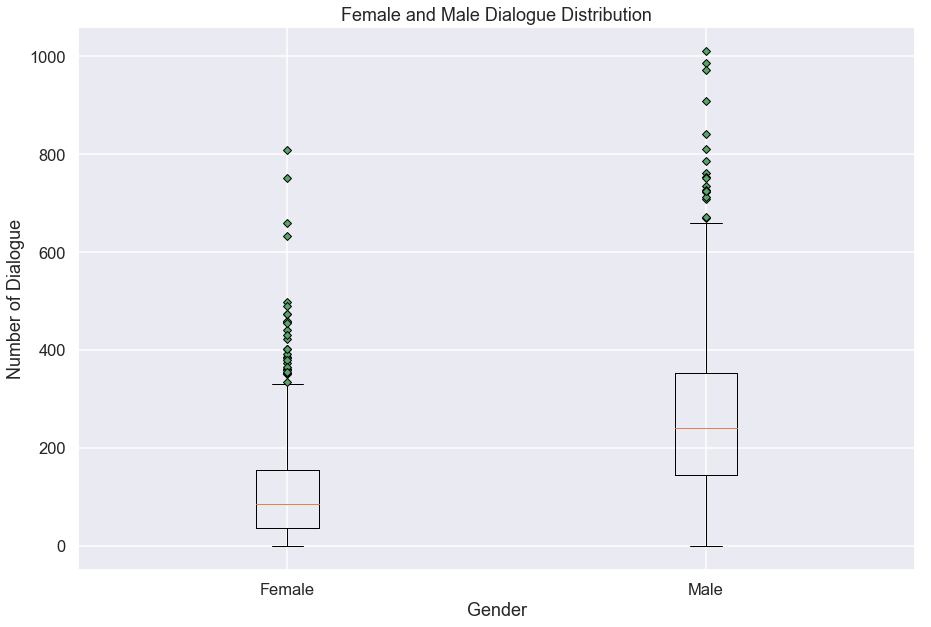

In [125]:
fig, ax = plt.subplots()
ax.set_title('Female and Male Dialogue Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Dialogue')
ax.boxplot([f_distribution,m_distribution],flierprops= dict(markerfacecolor='g', marker='D'))
plt.xticks([1,2], ['Female', 'Male'])
fig.set_size_inches(15, 10)
plt.show()

- Analysis:  
According to the boxplot above, the green line inside the left box is around 100, which means that the median of the number of dialogues that female spoke is around 100 lines. The green line inside the right box is around 250, which means that the median of the number of dialogues that male spoke is around 250 lines. In addition, the range of quartiles of female's data is between 50 to 170, which means 50% of the female has between 50 to 170 lines of dialogues. The range of quartiles of male's data is between 170 to 350, which means 50% of the male has between 170 to 350 lines of dialogues. There are some outliers in female's data that are between 600 to 800 and the outliers in female's data are between 850 to 1000.
Based on this graph, we know that the number of dialogue in general movie is distributed unevenly. Since the median of the number of dialogue that female spoke on each movie is far less than male and the dialogue distribution for the female is less than male, we can see that the spoke frequency of female characters is less than male characters on the movie.

### -Barplots

We make a barplot on the `f_average` and `m_average`. From this graph, we will be able to see the difference in dialogue average distribution based on gender.

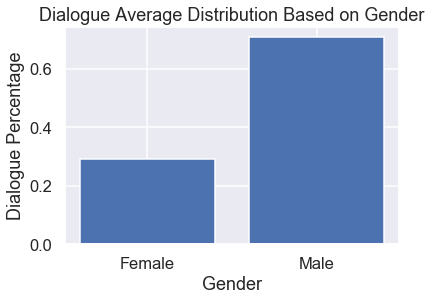

In [126]:
plt.bar(('Female', 'Male'),[f_average, m_average],align='center')
plt.title('Dialogue Average Distribution Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Dialogue Percentage')
plt.show()

- Analysis:  
According to the barplot above, female characters have an average of 30% of the dialogue in a movie while male characters have an average of 70%. This simply shows the huge difference between the proportion of dialogue distribution based on gender in the movie industry. Female obviously has less than half of the dialogue than male on the average movie, which further ensures the gender issue that exists in the movie industry.

Now, we will see how the spoke frequency change throughout the years. Thus, we store each movie with its year to the list `movie_year_list`, and sort the list by ascending order of years. Then, we iterate through each movie with ascending order of movie years, and store the number of dialogue that female and male spoke on that movie to the list `f_year_distribution` and `m_year_distribution`.

In [127]:
movie_year_list = []
for i in range(len(movie_titles_df)):
    movie_year_list.append([movie_titles_df.iloc[i]['movie_year'],movie_titles_df.iloc[i]['movie_ID']])

#sort the movie list by ascanding order of year
movie_year_list = np.array(sorted(movie_year_list))
year_list = movie_year_list[:,0]
f_year_distribution = []
m_year_distribution = []
for i in range(len(movie_year_list)):
    currmoive = dialogue_gender_df[dialogue_gender_df['movie_ID'] == movie_year_list[i][1]]
    female = len(currmoive[currmoive['gender'] == 'f'])
    male = len(currmoive[currmoive['gender'] == 'm'])
    f_year_distribution.append(female)
    m_year_distribution.append(male)    

We want to see how the number of dialogue that female and male spoke change throughout the years. So, we use polyfit to fit a 1-degree linear model, and use the model to get the linear regression with the given movie years from dataframe `dialogue_gender_df`. We save the result in `female_predict` and `male_predict`.

In [128]:
#prediction
a1, b1 = np.polyfit(range(0,len(f_year_distribution)), f_year_distribution,1)
female_predict = a1 * np.array(range(0,len(f_year_distribution))) + b1
a2, b2 = np.polyfit(range(0,len(m_year_distribution)), m_year_distribution,1)
male_predict = a2 * np.array(range(0,len(m_year_distribution))) + b2

### -Scatterplots

We make a scatterplot on the `f_year_distribution` and `m_year_distribution`. Also, we will draw the prediction line, `female_predict` and `male_predict`, with the given movie year range from `dialogue_gender_df`. From this graph, we will be able to see the change in the number of dialogue for female and male throughout the years.

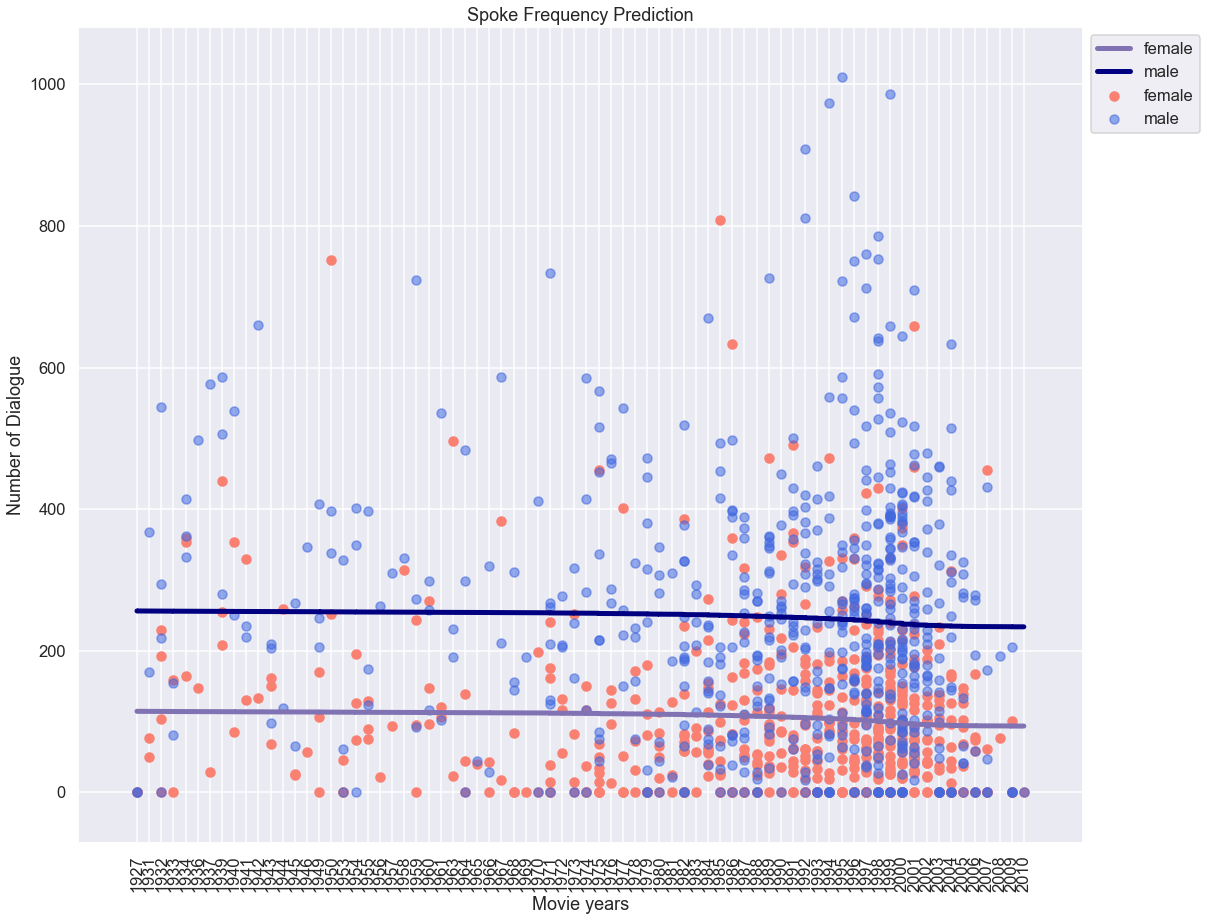

In [129]:
X = year_list
f, ax = plt.subplots()
ax.scatter(X,np.array(f_year_distribution), color='salmon', label = 'female')
ax.scatter(X,np.array(m_year_distribution), color='royalblue',label = 'male', alpha = 0.55)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.plot(X, female_predict, color='m',label = 'female',linewidth=5)
plt.plot(X, male_predict, color='navy',label = 'male',linewidth=5)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.title('Spoke Frequency Prediction')
plt.xlabel('Movie years')
plt.ylabel('Number of Dialogue')
plt.xticks(rotation='vertical')
f.set_size_inches(18, 15)

- Analysis:  
According to the scatterplot above, we can see that the blue line which predicts the number of dialogue that male looks like a horizontal line throughout the years at about 270. The pink line which predicts the number of dialogue that female also looks like a horizontal line at about 100. The blue line that predicts from male's data always lies above the pink line that predicts from female's data, and the blue dots which represent the number of dialogue that male appear generally above the pink dots which represent the number of dialogue that female.  
Based on these plots, we can conclude that the number of dialogue that female and male have in movies is distributed unequally. Male characters always have more dialogue than female characters in the movie. Thus, the spoken frequency of male will be higher than the female characters. This phenomena has existed in the movie industry for many years and do not have any changed since the blue and pink line grow horizontally throughout the years. It gives further evidence that gender inequality does exist in the movie industry.

## Explore Proportion of gender

We want to know what is the proportion of male and female characters in the movies overall. We take the data from the HollyWoodGender dataset, the movies are across 2000 to 2018. This section gives visualization and analysis of the proportion of female and male characters in movies. The dataframe we used in this section is `df_nofc`.

print the value counts out, so we know the basic outline of the numbers of characters in different movies

In [130]:
#print the value counts out
counts = df_nofc['name'].value_counts()
counts

Movie 43               27
Kill Bill: Volume 1    22
You Got Served         22
                       ..
Voyage of Time          1
Countdown to Zero       1
Stonewall Uprising      1
Name: name, Length: 3322, dtype: int64

Create a function called `female proportion` to caluculate the proportion of female in a movie. This function takes a string (movie name) as input, and out puts a number (proportion of female characters in this movie)

In [131]:
# a function that take movie as an input and output the proportion of female characters
def female_proportion (string):
    
        # get the value counts of gender in this movie
        df_string = df_nofc.loc[df_nofc['name'] == string]
        g_counts = df_string['gender'].value_counts()
        
        # if there are female characters, store the number of female characters in value_female
        # else, let value_female be 0
        if 'female' in g_counts.index.values:
            value_female = g_counts.loc['female']
        else: 
            value_female = 0
        
        # if there are male characters, store the number of female characters in value_male
        # else, let value_male be 0
        if 'male' in g_counts.index.values:
            value_male = g_counts.loc['male']
        else:
            value_male = 0
            
        # let value_total store the number of female and male characters
        value_total = value_female + value_male
        
        # if value_total is 0 (which means all characters in the movie is unknown gender), return 0
        if value_total == 0:
            return 0
        
        # calculate female proportion by deviding it, and return the result.
        proportion = value_female/value_total
        return proportion

Create a function called `male proportion` to caluculate the proportion of female in a movie. This function takes a string (movie name) as input, and out puts a number (proportion of female characters in this movie). We create two functions to avoid other unknown genders as confounding variables.

In [132]:
#a function that take movie as an input and output the proportion of male characters
def male_proportion (string):
    
        # get the value counts of gender in this movie
        df_string = df_nofc.loc[df_nofc['name'] == string]
        g_counts = df_string['gender'].value_counts()
        
        # if there are female characters, store the number of female characters in value_female
        # else, let value_female be 0
        if 'female' in g_counts.index.values:
            value_female = g_counts.loc['female']
        else: 
            value_female = 0
        
        # if there are male characters, store the number of female characters in value_male
        # else, let value_male be 0
        if 'male' in g_counts.index.values:
            value_male = g_counts.loc['male']
        else:
            value_male = 0
            
        # let value_total store the number of female and male characters
        value_total = value_female + value_male
        
        # if value_total is 0 (which means all characters in the movie is unknown gender), return 0
        if value_total == 0:
            return 0
        
        # calculate male proportion by deviding it, and return the result.
        proportion = value_male/value_total
        return proportion

The following 2 code cells are to test if the function is operating correctly

In [133]:
#test the function female_proportion
female_proportion ('Mission: Impossible 2')

0.125

In [134]:
male_proportion ('Mission: Impossible 2')

0.875

### -Female proportions

Next, apply `female proportion` to all values to the movies, and save the output female proportions to a variable called  `real_femalep`

In [135]:
#save all calculated female proportions to real_femalep
df_counts = counts.to_frame()
df_counts.reset_index(level=0, inplace=True)
real_femalep = df_counts["index"].apply(female_proportion)
real_femalep

0       0.41
1       0.26
2       0.22
        ... 
3319    0.00
3320    0.00
3321    0.00
Name: index, Length: 3322, dtype: float64

Next, we plot the histogram of the proportions of female characters in a movie. The x-axis is the proportion of female characters, and the y axis is the counts of movies with this proportion. The more positively skewed, the less female characters in movies overall.

Text(0.5, 0, 'proportion of female characters')

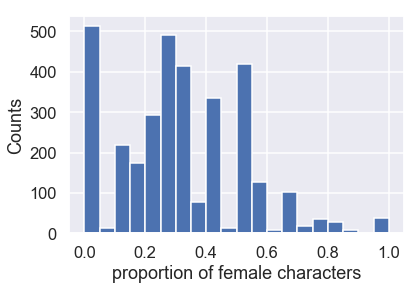

In [136]:
#plot the proportion of female proportions. 
real_femalep.hist(bins = 20)
plt.ylabel('Counts')
plt.xlabel('proportion of female characters')

### -Male proportions

Next, apply `male proportion` to all values to the movies, and save the output female proportions to a variable called  `real_malep`. We do this again to avoid the `unknown` gender as a confounding variable.

In [137]:
#save all calculated female proportions to real_malep
df_counts = counts.to_frame()
df_counts.reset_index(level=0, inplace=True)
real_malep = df_counts["index"].apply(male_proportion)
real_malep

0       0.59
1       0.74
2       0.78
        ... 
3319    0.00
3320    0.00
3321    0.00
Name: index, Length: 3322, dtype: float64

Next, we plot the histogram of the proportions of male characters in a movie. The x-axis is the proportion of male characters, and the y axis is the counts of movies with this proportion. The more positively skewed, the less male characters in movies overall.

Text(0.5, 0, 'proportion of male characters')

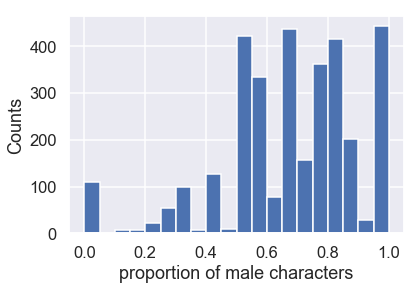

In [138]:
#plot the proportion of female proportions. The more positively skewed, the less female characters in movies.
real_malep.hist(bins = 20)
plt.ylabel('Counts')
plt.xlabel('proportion of male characters')

- Analysis:  
As the above histograms shows, the data of proportion of female characters is positively skewed, and the proportion of male characters is negatively skewed. It indicates that there are less female characters compared to other genders of characters overall. 
I also showed the histogram of male proportion, because there's also a number of "unknown" gender in the movies which could be a confounding variable, and movies that contain only unknown genders will be counted as proportion 0 in both male and female proporiton calculation. 

## Explore Movie Rating VS Gender
In this part, we are going to find out how gender affect to rate of movie. There is 4 graphs that we can simply check how gender and rate of movies are related.
### Visualization
### -Barplots 

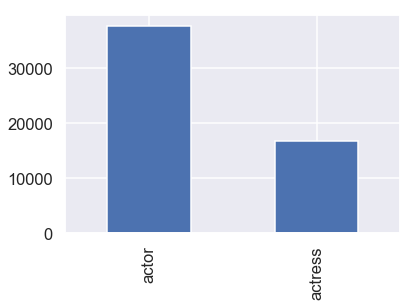

In [139]:
ratingVSsex["startYear"].value_counts()

ratingVSsex.head()

ratingVSsex["category"].value_counts().plot("bar")

f1 = plt.gcf()

Analysis: This graphe is showing relationship between gender and number of votes. As you can see, There is more people who vote to movie that male is main character. From this data, I can interpret movie that male is main character is more popular to populace and I also can say male character more plays a main character than female in the movie industry.

### -Two plotted graph

we made two-plotted graph to compare how rate of movie(y-axis) have been changed by gender on 1986 through 2018(x-axis). `p` takes group of `category`. The variables `actor` and `actress` take actor and actress values seperately and we draw the each of datas on same graph. 

0     1986
1     1987
2     1988
      ... 
31    2017
32    2018
33      \N
Name: startYear, Length: 34, dtype: object
0     6.03
1     5.99
2     5.98
      ... 
31    5.96
32    6.20
33    5.30
Name: averageRating, Length: 34, dtype: float64


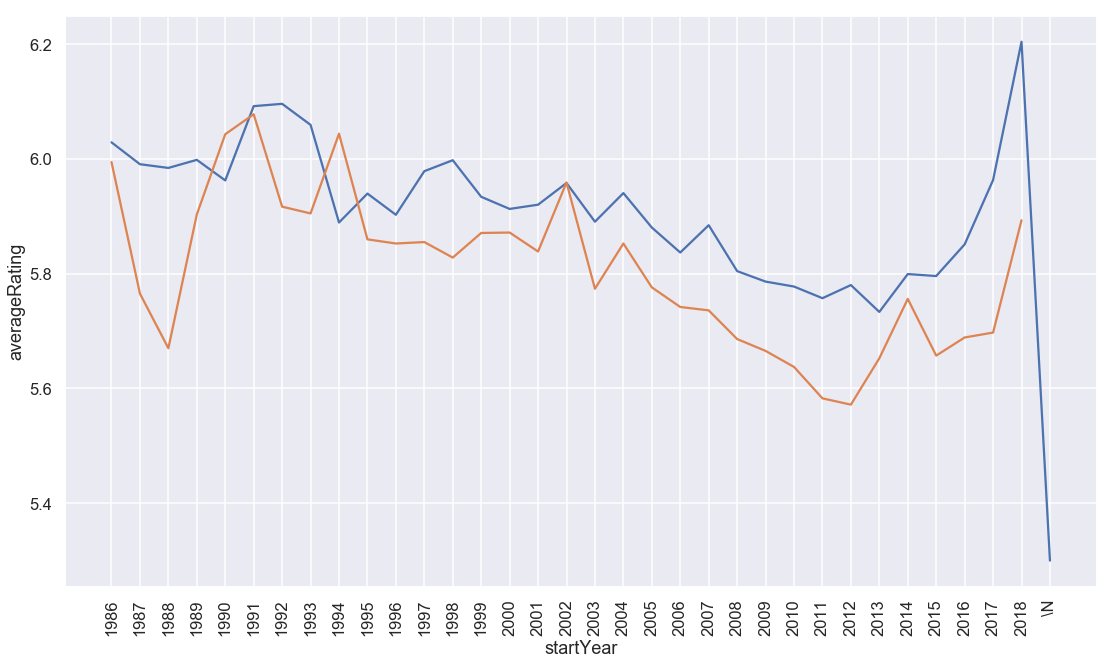

In [140]:
ratingVSsex = ratingVSsex.groupby(["category", "startYear"])["averageRating"].apply(np.mean).reset_index()


p = ratingVSsex.groupby("category")
actor = p.get_group("actor")
actress = p.get_group("actress")

print(actor["startYear"])
print(actor["averageRating"])


plt.plot(actor["startYear"], actor["averageRating"])
plt.plot(actress["startYear"], actress["averageRating"])
plt.xlabel("startYear")
plt.ylabel("averageRating")

plt.gcf().set_size_inches(18.5, 10.5)
plt.xticks(rotation=90)

plt.show()


Analysis: This graph showing each gender's averagRating through startYear. Movies that have male main character are generally having higher rate than movies that have female main chracter. Only in 1990 and 1994, female main character movie had higher average rating. However, we also can see that both gender of movie rating moving same. When actor's movie rating goes lower, then actress's movie rating also goes lower which means when something happen like economic depression things, movie ratings are affected together no matter what gender plays main character. 

There are some outlier for each gender. On 1988, actress's average rating is really low comparing to other actress's averag rating and actor's average rating is really high on 2018. Otherwise, movie that plays by male character have been rated higher than female.

### -Testing distribution

To run some statistical tests on our data, we should check the distributions. `h_ac` and `h_acss` takes each actor's averageRating and actress's averageRating and we are going to use `h_ac` and `h_acss` for `normaltest` function to test for mormality of the distribution. `normaltest` return two values: (1) a test statistic and (2) a p-value.
Save these values as `st_ac`, `p_ac`, `st_acss`, `p_acss`, respectively.

In [141]:
# TEST DISTRIBUTION
h_ac = ratingVSsex[ratingVSsex['category'] == 'actor']['averageRating'].values
h_acss = ratingVSsex[ratingVSsex['category'] == 'actress']['averageRating'].values

# TESTING NOMALITY, (1) a test statistic and (2) a p-value
st_ac, p_ac = normaltest(h_ac)
st_acss, p_acss = normaltest(h_acss)

print(st_ac)
print(p_ac)
print(st_acss)
print(p_acss)


25.296868903599446
3.2125856333588847e-06
1.1065519571072222
0.57506282772013


Based on these results, and using an alpha significance value of 0.01(this sig. value is what we used in the class):

Set boolean values (`True`, `False`) of whether each distribution can be considered to be normally distributed (set as `True` if the test supports it is normally distributed (or, more formally, we have not rejected the null hypothesis), and `False` if the test suggests the data is not normally distributed (we should reject the null hypothesis).

In [142]:
# Set boolean values
if p_ac < 0.01:
    print("reject p_ac")
if p_acss < 0.01:
    print("reject p_acss")
    
is_n_ac = True
is_n_acss = True

reject p_ac


Since `p_ac` variable is rejected. our normaltest for `p_ac` isn't behaving as expected but `p_acss` is passed, so our normaltest method is supposed to return p_acss value more than 0.01. 

### -Comparing each gender mean on averageRating

actor's data: plot the comparison of the data and a normal distribution. This plots a histogram, with the hypothetical normal distribution. 

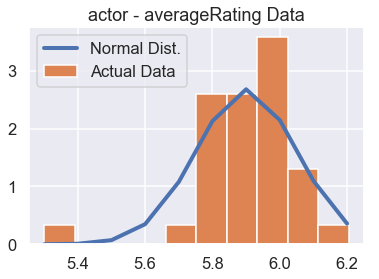

In [143]:
# graph for actor - averageRating
xs = np.arange(h_ac.min(), h_ac.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_ac), np.std(h_ac))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(h_ac, density=True, label='Actual Data');
plt.title('actor - averageRating Data')
plt.legend();

actress's data: plot the comparison of the data and a normal distribution. This plots a histogram, with the hypothetical normal distribution. 

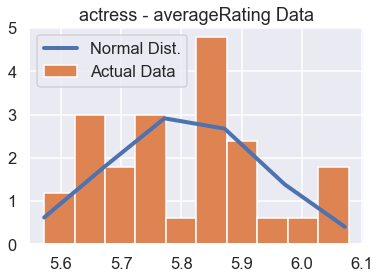

In [144]:
# graph for actress - averageRating
xs = np.arange(h_acss.min(), h_acss.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_acss), np.std(h_acss))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(h_acss, density=True, label='Actual Data');
plt.title('actress - averageRating Data')
plt.legend();

Analysis: Our `nomaltest` data was rejected and now you can see why it is rejected. threre is no value between 5.4 to 5.6 so it's `normaltest` return value so low. 

But you can still see mean value of actor's average rate.
By comparing mean of 'actor - averageRating' and 'actress - averageRating', we can see actor's mean is higher than actress's mean on averageRating. actor's mean is around at 5.9 and actress's mean is btween 5.7 and 5.8.


### -Data Analysis & Results

Now we are going to analysis the data to address relation between movie rating VS gender. 

Save the averageRating for actor to a variable called `h_ac`.
Save the averageRating for actress to a variable called `h_acss`.

Save these value to avg_`h_ac` for actor, and `avg_h_acss` for actress.

In [145]:
h_ac = ratingVSsex.loc[ratingVSsex['category'] == 'actor', ['averageRating']]
h_acss = ratingVSsex.loc[ratingVSsex['category'] == 'actress', ['averageRating']]

df1 = pd.DataFrame(data=h_ac.index, columns = ['averageRating'])
df2 = pd.DataFrame(data=h_acss.index, columns = ['averageRating'])

avg_h_ac = (ratingVSsex.loc[ratingVSsex['category'] == 'actor', ['averageRating']])['averageRating'].mean()
avg_h_acss = (ratingVSsex.loc[ratingVSsex['category'] == 'actress', ['averageRating']])['averageRating'].mean()

# Print out the average rating 
print('Average rating of actor is \t {:2.2f}'.format(avg_h_ac))
print('Average rating of actress is \t\t {:2.2f}'.format(avg_h_acss))

Average rating of actor is 	 5.90
Average rating of actress is 		 5.81


Based on the cell above, it looks like there might indeed be a difference in the average rating actor vs actress.

Now we want to statistically test this difference. To do so, we will use a t-test.

In [146]:
t_val, p_val = ttest_ind(h_ac, h_acss, equal_var = False)


if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


Since this test passed significance, our code and data is correct so far. 

We created a new dataframe, called `df2`, which only includes data from 'actor' and 'actress' categories. 
And by using `pivot_table` method, we created pivot table, and assigned it to a variable `pv`

In [147]:
df2 = (ratingVSsex.loc[(ratingVSsex['category'] == 'actor') | (ratingVSsex['category'] == 'actress')])
pv = df2.pivot_table(index=['category'], values = 'averageRating')
pv

outcome_1, predictors_1 = patsy.dmatrices('averageRating ~ category', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     7.241
Date:                Mon, 10 Jun 2019   Prob (F-statistic):            0.00905
Time:                        22:06:33   Log-Likelihood:                 36.205
No. Observations:                  67   AIC:                            -68.41
Df Residuals:                      65   BIC:                            -64.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.9010    

Here, we printed out ordinary least squares(OLS) to see if we can recover the coefficient we used to simulate the data. For this we used the libarary `sm`(statsmodels).

The actress variable is significant according to the t-test and our P-value is less than our confident level which is 0.01. It means there is a statistically significant relationship between the `averageRating` and `actress`(`averageRating` significantly predict `actress`).  

## Explore Grossing VS Gender

### Visualization
### -Histogram

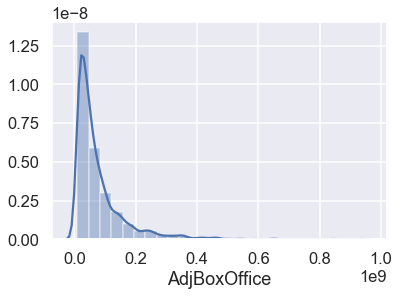

In [38]:
sns.distplot(df_grossing['AdjBoxOffice'], bins=25)

From the histogram above, we have noticed that the values in AdjBoxOffice are not normally distributed which can hurt prediction ability in some scenarios. To address this, we will perform a log transformation on the AdjBoxOffice values.

In [39]:
df_grossing = df_grossing.assign(AdjBoxOffice10 = df_grossing['AdjBoxOffice'])

So, we add a AdjBoxOffice10 column transform the AdjBoxOffice column using a log-base-10 transform. That is, replace each value in AdjBoxOffice10 with the  𝑙𝑜𝑔10  of that value.

In [40]:
df_grossing['AdjBoxOffice10'] = np.log10(df_grossing['AdjBoxOffice10'] )
df_grossing

,imdbID,Title,Year,AdjBoxOffice,LeadActor,Gender,AdjBoxOffice10
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,934381231,Daisy Ridley,f,8.97
1,tt0499549,Avatar,2009,843234239,Sam Worthington,m,8.93
2,tt0369610,Jurassic World,2015,654709324,Chris Pratt,m,8.82
...,...,...,...,...,...,...,...
2017,tt0183659,Pollock,2000,10085976,Ed Harris,m,7.00
2018,tt0345074,Connie and Carla,2004,10075024,Nia Vardalos,f,7.00
2019,tt1742650,I Don't Know How She Does It,2011,10048401,Sarah Jessica Parker,f,7.00


Next, we can draw the histogram again to check whether its distribution is enough for us to do further exploration.

### -Histogram

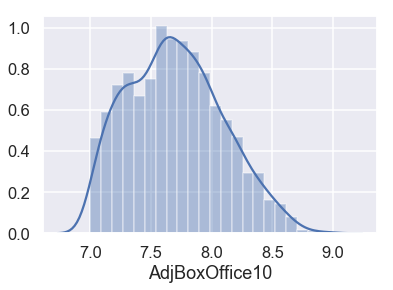

In [41]:
sns.distplot(df_grossing['AdjBoxOffice10'])

Check the histogram of AdjBoxOffice10, it is ditributed normally now, which is easier for us to further our exploration. Then, we classify the data frame to different gender, and explore their different movie number distribution. Also, check the mean gross of both genders.

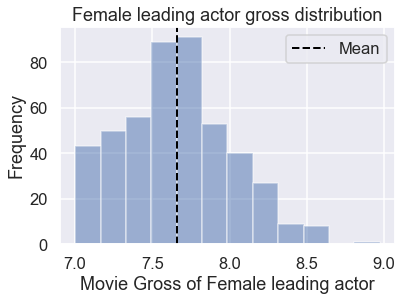

In [42]:
df_gross_f = df_grossing[df_grossing['Gender'] == 'f']
df_gross_f['AdjBoxOffice10'].plot.hist(bins=12, alpha=0.5)
f3 = plt.gcf()
gross_f_mean_10 = df_gross_f['AdjBoxOffice10'].mean()
plt.xlabel("Movie Gross of Female leading actor")
plt.title('Female leading actor gross distribution')
plt.axvline(gross_f_mean_10, color='black', linestyle='dashed', linewidth=2)
plt.legend({'Mean':gross_f_mean_10})

Analysis: From the histogram above, we can see that most female leading movies' grossings are in range 7.5~7.8 of log-base-10 of original box office, which is not very high when we transform to original box office, and it also leads to the mean of movie grossing becoming low.

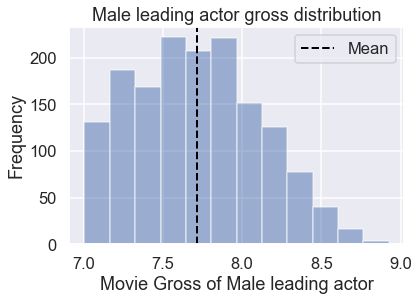

In [43]:
df_gross_m = df_grossing[df_grossing['Gender'] == 'm']
df_gross_m['AdjBoxOffice10'].plot.hist(bins=12, alpha=0.5)
f4 = plt.gcf()
plt.xlabel("Movie Gross of Male leading actor")
plt.title('Male leading actor gross distribution')
gross_m_mean_10 = df_gross_m['AdjBoxOffice10'].mean()
plt.axvline(gross_m_mean_10, color='black', linestyle='dashed', linewidth=2)
plt.legend({'Mean':gross_m_mean_10})

Analysis: From the histogram above, we can see that the distribution of male leading movies' grossing is flatter then female's and obviously, there are more movies have high grossings compared with female leading movies, which let the mean become higher than female's.

However, it may seem not so clear how big difference is when we separate gender in two histograms. In order to deal with this problem, we use a density plot and a grouped bar plot to put female and male leading movie gross distribution together, to explore the huge movie number difference between gender.

### - Density Plot

Text(0, 0.5, 'Density')

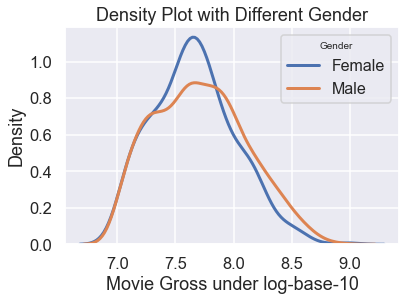

In [44]:
# List of different genders
gender = ['f', 'm']

# Iterate through two gender
for gender in gender:
    subset = df_grossing[df_grossing['Gender'] == gender]
    
    # Draw the density plot
    sns.distplot(subset['AdjBoxOffice10'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = gender)
    
# Plot formatting
legend = ['Female', 'Male']
plt.legend(legend, prop={'size': 16}, title = 'Gender')
plt.title('Density Plot with Different Gender')
plt.xlabel('Movie Gross under log-base-10')
plt.ylabel('Density')

Analysis: From above density plot, we can clearly observe the defferent distribution of female and male leading movie grossing. Blue line represents female leading movie grossing, orange line represents male leading movie grossing. What we can find is that female leading movies have a an obvious mode which is near its mean. However, male leading movies has a flatter distribution which cause them have a higher mean value. We will explore the difference more using grouped bar plot and t-test.

### - Grouped Bar Plot

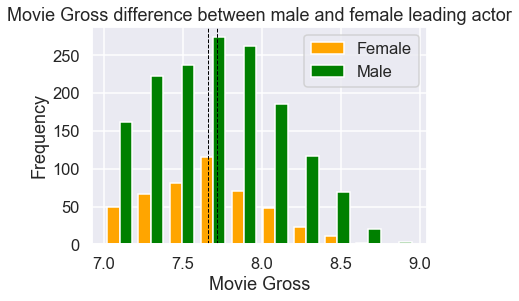

In [45]:
gross_f = df_gross_f['AdjBoxOffice10']
legend = ['Female', 'Male']
gross_m = df_gross_m['AdjBoxOffice10']
plt.hist([gross_f, gross_m], color=['orange', 'green'])
plt.xlabel("Movie Gross")
plt.ylabel("Frequency")
plt.legend(legend)
plt.xticks()
plt.yticks()
plt.axvline(gross_f_mean_10, color='black', linestyle='dashed', linewidth=1)
plt.axvline(gross_m_mean_10, color='black', linestyle='dashed', linewidth=1)
plt.title('Movie Gross difference between male and female leading actor')
plt.show()

Analysis: From above bar plot, through comparison with two genders, we can see that green bars, which represents male leading movies, are always at least 3 times higher than orange bars which represents female leading movies. Thus, we can conclude that there are much more male leading movies than female leading movies in each grossing. 
Then, I put two mean line in the plot, left is the mean of female leading movie grossings, right one the mean of male leading movie grossings. We can observe that even though under log-base-10 grossing,  average grossing of female and male leading movies still have an obvious difference. How big the difference is in real grossings?


To solve this question, I use the data in real box office to calculate mean and median values and percentage to show the big difference.

In [46]:
gross_f_mean = df_gross_f['AdjBoxOffice'].mean()
gross_m_mean = df_gross_m['AdjBoxOffice'].mean()
print("Female gross mean is: ", round(gross_f_mean, 2))
print("Male gross mean is: ", round(gross_m_mean, 2))
actual_difference = gross_m_mean - gross_f_mean
print("Actual difference of mean is: ", round(actual_difference, 2), "dollars.")
percentage_difference = actual_difference/gross_f_mean
print("Percentage difference of mean is: ", round(percentage_difference*100, 2), "%.")

gross_f_median = df_gross_f['AdjBoxOffice'].median()
gross_m_median = df_gross_m['AdjBoxOffice'].median()
print("Female gross median is: ", round(gross_f_median, 2))
print("Male gross median is: ", round(gross_m_median, 2))
actual_difference_median = gross_m_median - gross_f_median
print("Actual difference of median is: ", round(actual_difference, 2), "dollars.")
percentage_difference_median = actual_difference_median/gross_f_median
print("Percentage difference of median is: ", round(percentage_difference_median*100, 2), "%.")

Female gross mean is:  65586882.4
Male gross mean is:  79786060.37
Actual difference of mean is:  14199177.97 dollars.
Percentage difference of mean is:  21.65 %.
Female gross median is:  44144648.0
Male gross median is:  49841069.0
Actual difference of median is:  14199177.97 dollars.
Percentage difference of median is:  12.9 %.


Analysis: From above data, we can conclude that there really exists big difference in both mean and median, since the percentage differences are 21.65% and 12.9%, which are big numbers.

Then in order to verify my conclusion above, we use t-test to test to test mean value difference statistically to get an accurate answer.

In [47]:
t_val, p_val = stats.ttest_ind(df_gross_f['AdjBoxOffice10'], df_gross_m['AdjBoxOffice10'])
print(p_val)

0.0077614146355086365


If we use an alpha value of 0.01, we can see that p_val is smaller than this value, which means there is really a significant difference between female and male leading movie's box office.

In [48]:
#check year range of movies
df_grossing['Year'].unique()

array([2015, 2009, 2012, 2008, 2004, 2002, 2006, 2003, 2010, 2013, 2001,
       2011, 2007, 2000, 2005, 2014, 2016])

After exploring mean and median value of male and female leading movie grossings, we change an angle to continue exploring. Which is, what is the proportion of female in past years' highest grossing movies?

In [49]:
# A function which find given year's highest grossing
def calculate_years_highest_gross(year):
    highest_grossing = 0
    for i in range(0, len(df_grossing)):
        this_year = df_grossing.loc[i, 'Year']
        this_grossing = df_grossing.loc[i,'AdjBoxOffice']
        if this_year == year:
            if highest_grossing < this_grossing:
                highest_grossing = this_grossing
    return highest_grossing

In [50]:
# form pairs of year and that year's highest grossing
pair = {}
for year in range(2000, 2017):
    average_this_year = calculate_years_highest_gross(year)
    pair.update({year: average_this_year})

In [51]:
#get the gender of the movie with highest grossing of each year, and count proportion of female and male
female_highest = 0
male_highest = 0
for year in range(2000, 2017):
    df_highest = df_grossing[df_grossing['AdjBoxOffice'] == pair.get(year)]
    if df_highest['Gender'].all() == 'f':
        female_highest += 1
    else:
        male_highest += 1
print("During 17 years, there are", female_highest, "highest grossing movies of the year whose leading actor is female.", " The proportion of female leading highest grossing films is:", round(100*female_highest/(male_highest+female_highest), 2), "%")

During 17 years, there are 3 highest grossing movies of the year whose leading actor is female.  The proportion of female leading highest grossing films is: 17.65 %


Analysis: From above data, we can see that from 2000 to 2016, only 3 out of 17 female leading movies gain highest grossing of the year. We can conclude that generally male leading movies are more poplular and appealing among audience. And, audience prefer to watch male leading films.

Since our dataset rank movies from highest grossing to lowest one, we will next extract 200 highest grossing films to analyze gender proportion in it.

In [52]:
#get top 200 movies' data as a new data frame
df_top200 = df_grossing.iloc[0:200, :]

In [53]:
# Extract Gender columns of original and top200 datafram
df_top200_leadingGender_portion = df_top200['Gender'].value_counts().to_frame()
df_top200_leadingGender_portion.rename(columns={'Gender':'Gender_top200grossing'}, inplace=True)
df_grossing_leadingGender_portion = df_grossing['Gender'].value_counts().to_frame()
df_grossing_leadingGender_portion.rename(columns={'Gender':'Gender_grossing'}, inplace=True)

In [54]:
#merge them together to see more clearly
df_leadingGender_portion = pd.merge(df_top200_leadingGender_portion, df_grossing_leadingGender_portion, left_index=True, right_index=True)
df_leadingGender_portion

,Gender_top200grossing,Gender_grossing
m,173,1553
f,27,467


In [55]:
print("There are", round(100*173/1553, 2), "% male leading movies whose grossings are in top 10% of total male leading movies.")
print("But, there are only", round(100*27/467, 2),  "% female leading movies whose grossings are in top 10% of total female leading movies, which is about half of male's proportion.")

There are 11.14 % male leading movies whose grossings are in top 10% of total male leading movies.
But, there are only 5.78 % female leading movies whose grossings are in top 10% of total female leading movies, which is about half of male's proportion.


Analysis: From the data above, we can see that there are the proportion of top 10% male leading movies out of total male leading movies is twice as big as female's proportion, which is a big difference in proportion, we can conlude that compared to female leading movies, male leading movies is actually more likely to gain higher grossings, and is more popular than female leading movies.

### - Pie Chart

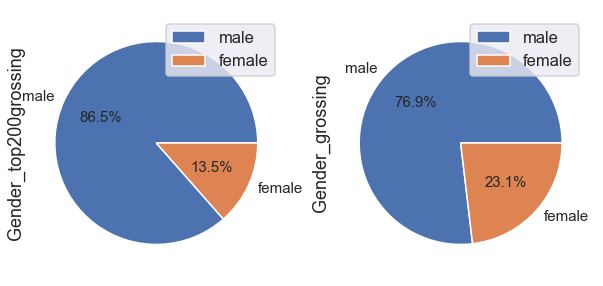

In [56]:
plot = df_leadingGender_portion.plot.pie( subplots=True, labels = ['male', 'female'], figsize=(10, 5), autopct='%1.1f%%', textprops={'fontsize': 15})

Analysis: This pie chart compares gender proportion in top 10% grossing films and all films. From the pie chart, we can easily see the result only 13.5% of movies in top 10% grossing films are female leading films. Which is near half of female proportion in all films. We can conclude that for higher grossing films, female leading movies occupy fewer percentage than in all films, which means among high grossing films, they are less attracting than male leading movies.

# Ethics & Privacy

All the datasets we collect are free from online and they all grant permission for everyone to use, which state on their readme files or data description files. Also, since some of these datasets are collected for analysis purpose, there might be similar analysis appeared before.

Since the datasets do not contain any personal information and all the data are public, so using these data won't consider an infringement of privacy.  

The potential ethical issue can be if there is more action movie or hero movie in our dataset, it could make a
big difference between male and female about taking more scenes in movies, but we are going to try not to
focus on only one side. We will try to collect as many different genres of movies data as we can to avoid biases.  
Although gender inequality seems to be a worldwide problem, the degree of inequality may differ among
different countries and at different times. Since our movie data are mostly from English-spoken countries
and European countries, also, the release date of moves are mainly from the 1980s to now. Thus, our main
research scope of gender inequality problem is among English-spoken countries and European countries
from the 1980s to now.  

The result of our analysis may be used by someone who is interested in the topic of the gender inequality if the film industry, and since our dataset focuses on the film industry among English-spoken countries, other NonEnglish-spoken countries may find that our result may inapplicable. Thus, we will clearly state here that our analysis and result is just specific for the film industry in English-spoken countries.

# Conclusion & Discussion

In conclusion, gender inequality does exist in the film industry in most of the English-Spoken countries for many years. In order to explore the gender inequality in the film industry, we bring up some sub-questions to compare the spoke frequency, rating, grossing verse gender.  
From the dataset, Cornell Movie--Dialogs Corpus, that we find on the website of Department of Information Science, Cornell University, we collect 304,713 utterances from 617 different movies. Then, after we separate these dialogues based on gender,  we find out that the number of dialogue distributed to female and male characters is uneven. Male characters always tend to have more dialogue than female characters in the movies throughout the years. Therefore, the spoke frequency of movie characters is influenced by their gender, which male characters speak more frequent than female characters.  
In addition, from the analyze gender and grossing dataset, we collect 2000 movies data. We use two angles to explore the gender problem. First, we compare distribution, mean and median value of movie grossing based on gender difference, and we found that female leading movies' number, mean grossing, and median grossing are all far fewer than male leading movies, which indicates that female leading movies' box office is bleaker than male leading movies' box office. Second, we explore the gender proportion of top-grossing movies in 17 years and the top 10% grossing movies. And we found that female's proportion is far less than male's proportion in each of exploration, which means male leading movies are more likely to gain higher box office. In general, male leading movies obviously earn more than female leading movies, which means that female leading movies don't have enough strength or charm to appeal audience to watch and directors to make such kinds of movie, and also means female are not valued enough and gender inequality still exists until now.  
Then, we analyze the proportion of gender in movies overall. We found that there are overall more male gendered characters than female gendered characters. First we wrote functions to calculate both male and female characters, secondly, we plotted both proportions of female and male characters in movies to avoid the unknown gender as a confounding variable. We found that the female proportion in movies is positively skewed, and the male proportion in movies is negatively skewed, which means that there are less female characters in movies overall. This indicates that in the movie industry, the male characters are still dominating.   
Also, from the movie rating VS gender dataset, we can easily see that there is a difference between actor and actress on the rate of movie. Our hypothesis was the movie that male main character plays will make a higher rate of the movie than the female main character. And it turns out just as we expected. When we compare that through the year, the result is also the same. However, we had expected there is a lot more average rating difference between the male characters and the female characters, but there was only a little difference which is not expected. Since we didn't research in the same genre of movie, we don't know exactly which genre of movie we collected. If we have more action genre of movie, it will lead to the more male main character. It is kind of our limitation on this dataset.   
Overall, our analysis points out the fact that gender inequality does exist in the film industry in most of the English-Spoken countries, and our society should pay more attention and work to eliminate this issue. Everyone should be treated in any field of lives. Only after people get the euqal chances to speak and represent themselves, our society can finally achieve harmony.